# Connectivity issue

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools

from util import *

In [3]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

In [4]:
pd.set_option('max_colwidth', 60)

In [5]:
PATH_DATA = Path('.') / '..' / 'data'

## Issue description

In cases where one atom connects to multiple dummy atoms, the dummy atom's subpocket assignments are incorrect.

## Load fragment library

In [6]:
fragment_library_concat = pd.read_csv('../data/fragment_library/fragment_library.csv')
PandasTools.AddMoleculeColumnToFrame(fragment_library_concat, 'smiles')

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
0,AAK1,NAK,Other,5l4q,LKB,B,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP FP SE,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,Nc1c[nH]c2ncccc12,[11*]c1cnc2[nH]cc(N[27*])c2c1,
1,AAK1,NAK,Other,5te0,XIN,,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,
2,ABL1,Abl,TK,2f4j,VX6,,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,Cc1cc(N)[nH]n1,[22*]Nc1cc(C)n[nH]1,
3,ABL1,Abl,TK,2gqg,1N1,B,A,AP,AP AP AP AP AP AP AP AP AP AP GA SE,14 14 14 6 5 5 14 14 14 6 na na,Nc1ncc(C=O)s1,[15*]Nc1ncc(C([41*])=O)s1,
4,ABL1,Abl,TK,2v7a,627,,B,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP...,8 8 8 8 8 5 5 6 6 8 8 8 8 8 8 8 8 8 8 3 3 3 3 3 na na,COCC(=O)n1cc2[nH]nc(NC=O)c2c1,[8*]C(=O)Nc1n[nH]c2cn(C(=O)[C@@H]([46*])OC)cc12,

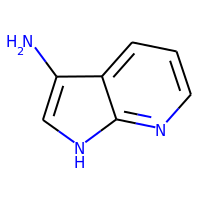
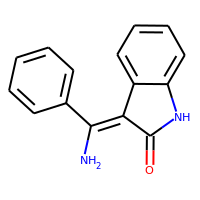
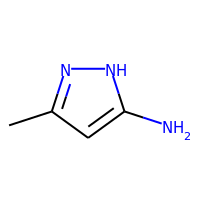
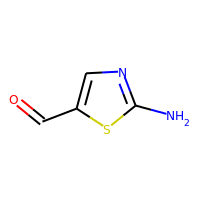
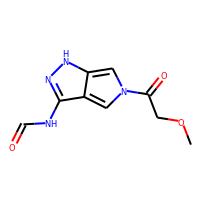

In [7]:
fragment_library_concat.head()

## Get example structures

In [8]:
complex_pdb_examples = ['3w2s', '4yjq', '4jr3']

### Correct fragmentation (3w2s)

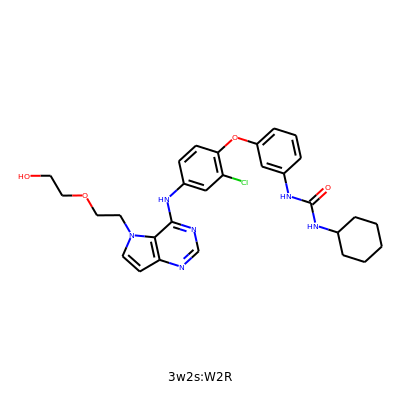

In [9]:
draw_ligands_from_pdb_ids([complex_pdb_examples[0]], sub_img_size=(400,400))

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
1039,EGFR,EGFR,TK,3w2s,W2R,A,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP AP AP GA FP,9 9 9 9 9 9 9 9 9 9 9 9 5 5 na na,Nc1ncnc2cc[nH]c12,[23*]Nc1ncnc2ccn([46*])c12,
3298,EGFR,EGFR,TK,3w2s,W2R,A,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP AP,8 8 8 8 8 8 4 4 4 4 4 4 3 3 3 na,CCOCCO,[60*]CCOCCO,
6361,EGFR,EGFR,TK,3w2s,W2R,A,A,GA,GA GA GA GA GA GA GA GA GA GA GA B1 AP,16 16 16 16 16 16 16 16 16 3 16 na na,Oc1ccccc1Cl,[24*]Oc1ccc([61*])cc1Cl,
7058,EGFR,EGFR,TK,3w2s,W2R,A,A,B1,B1 B1 B1 B1 B1 B1 B1 B1 B1 B1 GA B2,16 16 16 16 16 16 16 16 16 16 na na,c1ccccc1,[63*]c1cccc([70*])c1,
7127,EGFR,EGFR,TK,3w2s,W2R,A,A,B2,B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2 B2...,1 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 5 5...,NC(=O)NC1CCCCC1,[22*]NC(=O)NC1CCCCC1,

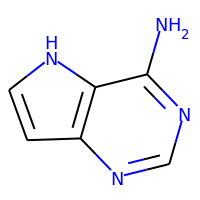
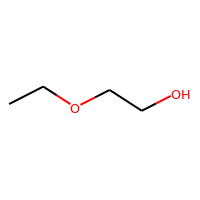
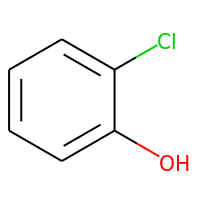
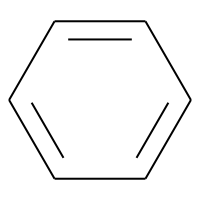
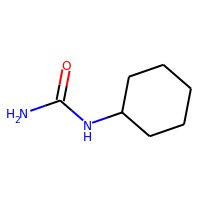

In [10]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb_examples[0])

### Incorrect example (4yjq)

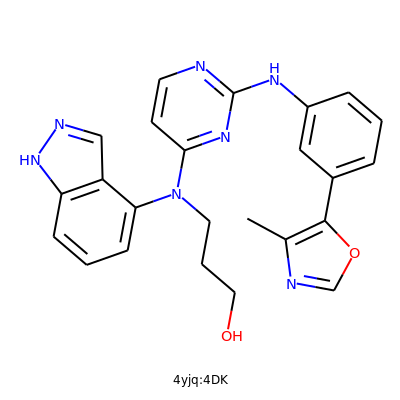

In [11]:
draw_ligands_from_pdb_ids([complex_pdb_examples[1]], sub_img_size=(400,400))

Correct assignments to neighbors are:

- GA: AP and FP(1) (on same GA atom) **[but is in code FP and FP]**
- AP: GA and SE
- FP(1): GA
- SE: AP and FP(2)
- FP(2): SE

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
2221,SYK,Syk,TK,4yjq,4DK,A,A,AP,AP AP AP AP AP AP AP AP AP AP GA SE,5 5 14 14 14 14 14 14 14 14 na na,Nc1ncccn1,[17*]Nc1nccc([28*])n1,
4215,SYK,Syk,TK,4yjq,4DK,A,A,FP,FP FP FP FP FP FP FP FP FP FP SE,8 8 8 8 14 14 14 14 14 14 na,Cc1cocn1,[10*]c1ocnc1C,
4216,SYK,Syk,TK,4yjq,4DK,A,A,FP,FP FP FP FP FP FP FP FP FP FP FP GA,4 4 4 4 4 4 4 4 4 3 3 na,CCCO,[28*]CCCO,
5781,SYK,Syk,TK,4yjq,4DK,A,A,SE,SE SE SE SE SE SE SE SE SE SE AP FP,16 16 16 16 16 16 16 16 16 16 na na,c1ccccc1,[9*]c1cccc([18*])c1,
6811,SYK,Syk,TK,4yjq,4DK,A,A,GA,GA GA GA GA GA GA GA GA GA GA GA GA GA GA GA FP FP,5 16 16 16 16 16 16 16 16 16 16 16 16 16 16 na na,Nc1cccc2[nH]ncc12,[26*]N([29*])c1cccc2[nH]ncc12,

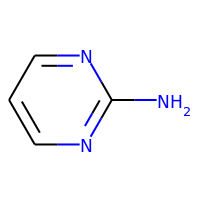
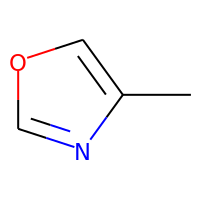
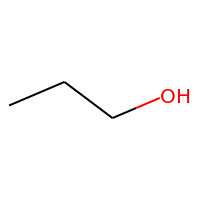
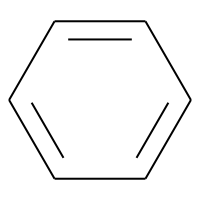
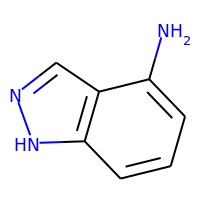

In [12]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb_examples[1])

### Incorrect example (4jr3)

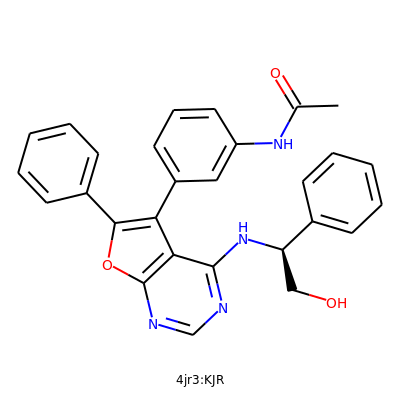

In [14]:
draw_ligands_from_pdb_ids([complex_pdb_examples[2]], sub_img_size=(400,400))

Correct assignments to neighbors are:

- AP: SE and FP(1) and FP(2)
- FP(1): AP and GA **[but is in code AP and AP]**
- SE: AP
- FP(2): AP
- GA: FP(1)

Look at https://docs.google.com/presentation/d/1ojk8xsBCz4qFs5TmMjFDx8ishIzP5rxp-T4Cp6ohpUg/edit?usp=sharing

,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,subpocket,atom_subpockets,atom_environments,smiles,smiles_dummy_atoms,ROMol
1047,EGFR,EGFR,TK,4jr3,KJR,,A,AP,AP AP AP AP AP AP AP AP AP AP AP AP FP SE FP,16 16 16 16 16 16 16 16 16 16 5 5 na na na,Nc1ncnc2occc12,[17*]c1c([21*])oc2ncnc(N[41*])c12,
3304,EGFR,EGFR,TK,4jr3,KJR,,A,FP,FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP FP AP,1 1 1 1 1 1 5 5 16 16 16 16 16 16 16 16 16 16 na,CC(=O)Nc1ccccc1,[18*]c1cccc(NC(C)=O)c1,
3305,EGFR,EGFR,TK,4jr3,KJR,,A,FP,FP FP FP FP FP FP FP AP AP,8 8 8 8 8 3 3 na na,CCO,[39*][C@@H]([48*])CO,
5085,EGFR,EGFR,TK,4jr3,KJR,,A,SE,SE SE SE SE SE SE SE SE SE SE SE AP,16 16 16 16 16 16 16 16 16 16 16 na,c1ccccc1,[20*]c1ccccc1,
6369,EGFR,EGFR,TK,4jr3,KJR,,A,GA,GA GA GA GA GA GA GA GA GA GA GA FP,16 16 16 16 16 16 16 16 16 16 16 na,c1ccccc1,[41*]c1ccccc1,

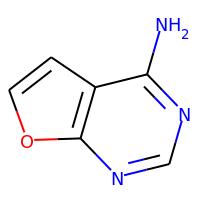
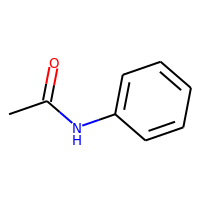
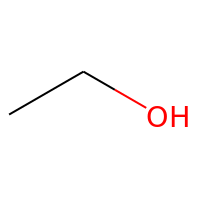
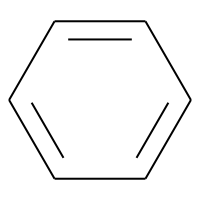
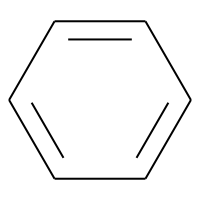

In [15]:
fragment_library_concat.groupby('complex_pdb').get_group(complex_pdb_examples[2])

## How many fragments have multiple dummy atoms per atom?